

{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Add a custom legend to a map in `R`.

* Plot a vector dataset by attributes in `R`.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You will need a computer with internet access to complete this lesson and the data for week 5 of the course.



[<i class="fa fa-download" aria-hidden="true"></i> Download week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }



</div>



## Plot Lines by Attribute Value

To plot vector data with the color of each objected determined by it's associated attribute values, the

attribute values must be class = `factor`. A **factor** is similar to a category

- you can group vector objects by a particular category value - for example you

can group all lines of `TYPE=footpath`. However, in `R`, a factor can also have

a determined *order*.



By default, `R` will import spatial object attributes as `factors`.



<i class="fa fa-star"></i> **Data Tip:** If our data attribute values are not

read in as factors, we can convert the categorical

attribute values using `as.factor()`.

{: .notice}




In [1]:
import os
import numpy as np
import pandas as pd

import rasterio as rio
import geopandas as gpd
import earthlab as et
import os.path as op

import matplotlib.pyplot as plt
plt.ion()

In [2]:
# ```{r load-libraries, message=FALSE, warning=FALSE}

# # load libraries

# library(raster)

# library(rgdal)

# options(stringsAsFactors = FALSE)



# ```




Next, import and explore the data.




In [3]:
path_data = et.data.get_data('week_05')

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [4]:
os.chdir('/Users/choldgraf/earth-analytics/')

In [5]:
sjer_roads = gpd.read_file("./data/week_05/california/madera-county-roads/tl_2013_06039_roads.shp")


In [6]:
print(type(sjer_roads['RTTYP']))
print(sjer_roads['RTTYP'].unique())

<class 'pandas.core.series.Series'>
['M' '' 'S' 'C']


In [7]:
# ```{r convert-to-factor}

# # import roads

# sjer_roads <- readOGR("data/week5/california/madera-county-roads",

#                       "tl_2013_06039_roads")

# # view the original class of the TYPE column

# class(sjer_roads$RTTYP)

# unique(sjer_roads$RTTYP)

# ```




It looks like we have some missing values in our road types. We want to plot all

road types even those that are NA. Let's change the roads with an `RTTYP` attribute of

NA to "unknown".



Following, we can convert the road attribute to a factor.




In [8]:
# set all NA values to "unknown" so they still plot
sjer_roads = sjer_roads.replace({'RTTYP': {np.nan, "Unknown"}})

sjer_roads['RTTYP'].value_counts()

     5149
M    4456
S      25
C      10
Name: RTTYP, dtype: int64

In [9]:
# ```{r adjust-value-unknown }

# # set all NA values to "unknown" so they still plot

# sjer_roads$RTTYP[is.na(sjer_roads$RTTYP)] <- "Unknown"

# unique(sjer_roads$RTTYP)



# # view levels or categories - note that there are no categories yet in our data!

# # the attributes are just read as a list of character elements.

# levels(sjer_roads$RTTYP)

In [10]:
sjer_roads['RTTYP'].describe()

count     9640
unique       4
top           
freq      5149
Name: RTTYP, dtype: object

In [11]:
# # Convert the TYPE attribute into a factor

# # Only do this IF the data do not import as a factor!

# sjer_roads$RTTYP <- as.factor(sjer_roads$RTTYP)

# class(sjer_roads$RTTYP)

# levels(sjer_roads$RTTYP)



# # how many features are in each category or level?

# summary(sjer_roads$RTTYP)

# ```



When we use `plot()`, we can specify the colors to use for each attribute using

the `col=` element. To ensure that `R` renders each feature by it's associated

factor / attribute value, we need to create a `vector` or colors - one for each

feature, according to its associated attribute value / `factor` value.



To create this vector we can use the following syntax:



`c("colorOne", "colorTwo", "colorThree")[object$factor]`



Note in the above example we have



1. A vector of colors - one for each factor value (unique attribute value)

2. The attribute itself (`[object$factor]`) of class `factor`.



Let's give this a try.






In [12]:
n_colors = len(sjer_roads['RTTYP'])

In [13]:
# ``` {r palette-and-plot, fig.cap="Adjust colors on map by creating a palette."}

# # count the number of unique values or levels

# length(levels(sjer_roads$RTTYP))

In [14]:
roadPalette = {'M': 'blue', 'S': 'green', 'C': 'purple', '': 'grey'}

In [15]:
# # create a color palette of 4 colors - one for each factor level

# roadPalette <- c("blue", "green", "grey", "purple")

# roadPalette

In [16]:
# # create a vector of colors - one for each feature in our vector object

# # according to its attribute value

# roadColors <- c("blue", "green", "grey", "purple")[sjer_roads$RTTYP]

# head(roadColors)

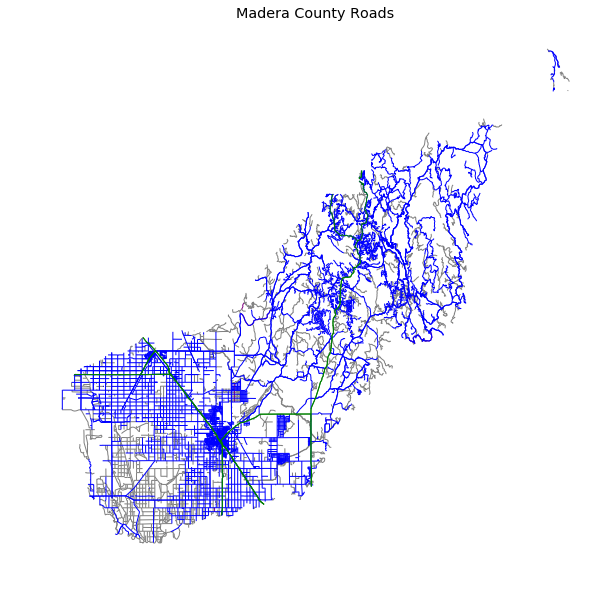

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color, ax=ax)
ax.set(title='Madera County Roads')

In [18]:
# # plot the lines data, apply a diff color to each factor level)

# plot(sjer_roads,

#      col=roadColors,

#      lwd=2,

#      main="Madera County Roads")



# ```



### Adjust Line Width

We can also adjust the width of our plot lines using `lwd`. We can set all lines

to be thicker or thinner using `lwd=`.




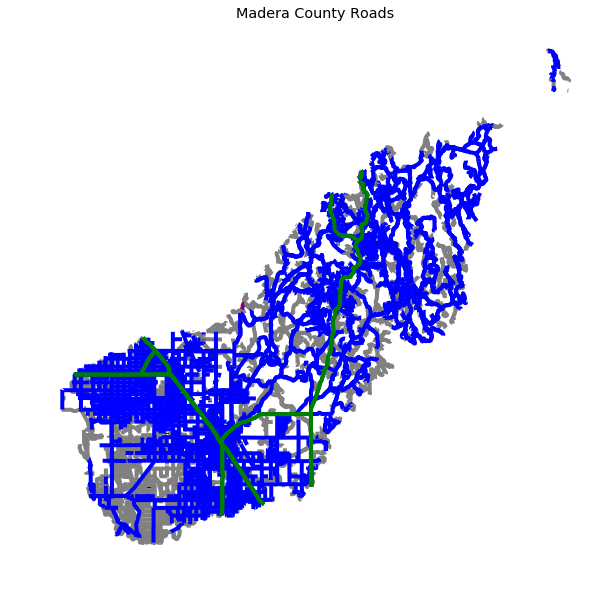

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color, ax=ax, linewidth=4)  # Make lines thicker
ax.set(title='Madera County Roads')

In [20]:
# ```{r adjust-line-width, fig.cap="map of madera roads"}

# # make all lines thicker

# plot(sjer_roads,

#      col=roadColors,

#      main="Madera County Roads\n All Lines Thickness=6",

#      lwd=6)



# ```




### Adjust Line Width by Attribute



If we want a unique line width for each factor level or attribute category

in our spatial object, we can use the same syntax that we used for colors, above.



`lwd=c("widthOne", "widthTwo","widthThree")[object$factor]`



Note that this requires the attribute to be of class `factor`. Let's give it a

try.




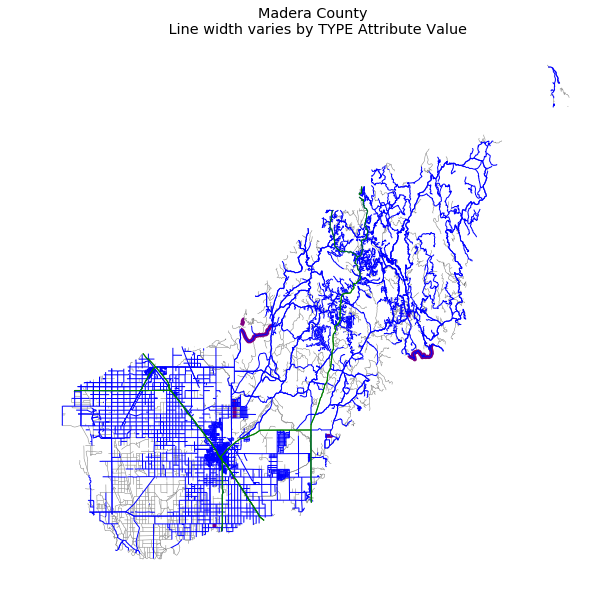

In [21]:
lineWidths = {'M': 1, 'S': 1, 'C': 4, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype])
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')

In [22]:
# ```{r line-width-unique, fig.cap="Map with legend that shows unique line widths." }

# class(sjer_roads$RTTYP)

# levels(sjer_roads$RTTYP)

# # create vector of line widths

# lineWidths <- (c(1, 2, 3, 4))[sjer_roads$RTTYP]

# # adjust line width by level

# # in this case, boardwalk (the first level) is the widest.

# plot(sjer_roads,

#      col=roadColors,

#      main="Madera County Roads \n Line width varies by TYPE Attribute Value",

#      lwd=lineWidths)

# ```




<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge: Plot line width by attribute



We can customize the width of each line, according to specific attribute value,

too. To do this, we create a vector of line width values, and map that vector

to the factor levels - using the same syntax that we used above for colors.

HINT: `lwd=(vector of line width thicknesses)[spatialObject$factorAttribute]`



Create a plot of roads using the following line thicknesses:



1. **unknown** lwd = 3

2. **M** lwd = 1

3. **S** lwd = 2

4. **C** lwd = 1.5



</div>




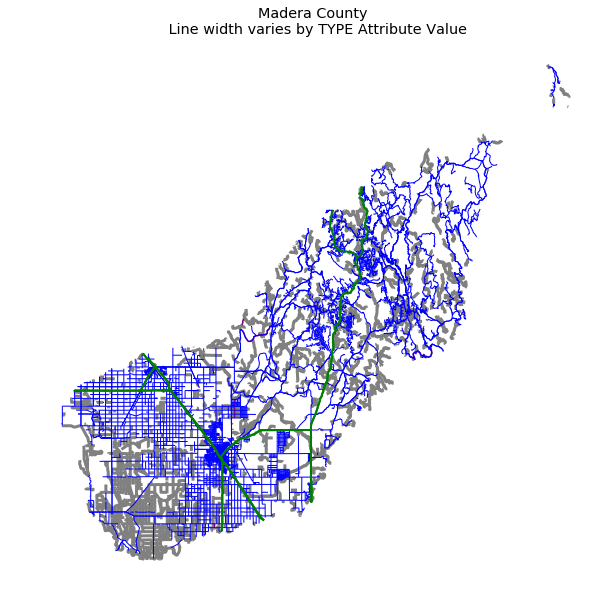

In [23]:
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, '': 3}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype])
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')

In [24]:
# ```{r roads-map, include=TRUE, results="hide", echo=FALSE, fig.cap="roads map modified"}

# # view the factor levels

# levels(sjer_roads$RTTYP)

# # create vector of line width values

# lineWidth <- c(1.5, 1, 2, 3)[sjer_roads$RTTYP]

# # view vector

# lineWidth



# # in this case, boardwalk (the first level) is the widest.

# plot(sjer_roads,

#      col=roadColors,

#      main="Madera County Roads \n Line width varies by Type Attribute Value",

#      lwd=lineWidth)



# ```




<i class="fa fa-star"></i> **Data Tip:** Given we have a factor with 4 levels,

we can create an vector of numbers, each of which specifies the thickness of each

feature in our `SpatialLinesDataFrame` by factor level (category): `c(6,4,1,2)[sjer_roads$RTTYP]`

{: .notice}



## Add Plot Legend

We can add a legend to our plot too. When we add a legend, we use the following

elements to specify labels and colors:



* **location**: we can specify an x and Y location of the plot Or generally specify the location e.g. 'bottomright'

keyword. We could also use `top`, `topright`, etc.

* `levels(objectName$attributeName)`: Label the **legend elements** using the

categories of `levels` in an attribute (e.g., levels(sjer_roads$RTTYP) means use

the levels C, S, footpath, etc).

* `fill=`: apply unique **colors** to the boxes in our legend. `palette()` is

the default set of colors that `R` applies to all plots.



Let's add a legend to our plot.




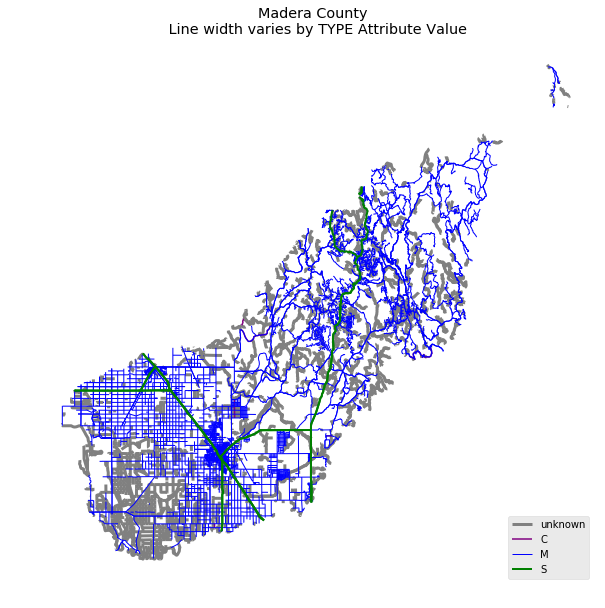

In [25]:
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, '': 3}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
ax.legend(loc='lower right')

In [26]:
# ```{r add-legend-to-plot, fig.cap="SJER roads map with custom legend." }

# # add legend to plot

# plot(sjer_roads,

#      col=roadColors,

#      main="Madera County Roads\n Default Legend")



# # we can use the color object that we created above to color the legend objects

# roadPalette



# # add a legend to our map

# legend("bottomright",   # location of legend

#       legend=levels(sjer_roads$RTTYP), # categories or elements to render in

# 			 # the legend

#       fill=roadPalette) # color palette to use to fill objects in legend.



# ```




We can tweak the appearance of our legend too.



* `bty=n`: turn off the legend BORDER

* `cex`: change the font size



Let's try it out.




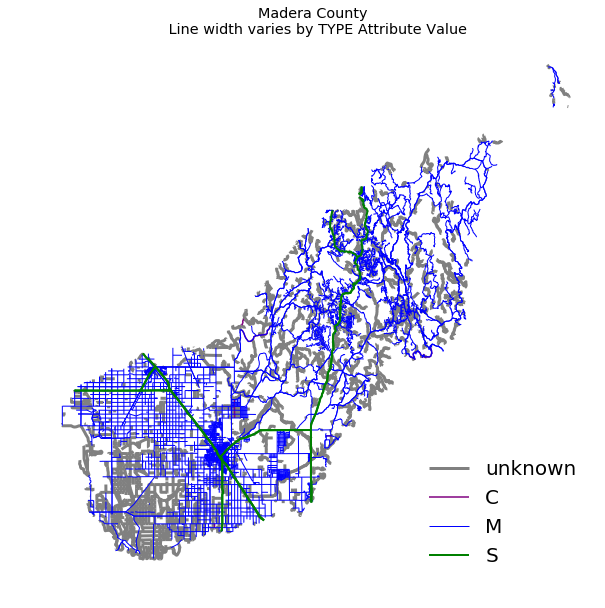

In [27]:
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, '': 3}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
ax.legend(loc='lower right', fontsize=20, frameon=False)

In [28]:
# ```{r modify-legend-plot, fig.cap="modified custom legend" }

# # adjust legend

# plot(sjer_roads,

#      col=roadColors,

#      main="Madera County Roads \n Modified Legend - smaller font and no border")

# # add a legend to our map

# legend("bottomright",

#        legend=levels(sjer_roads$RTTYP),

#        fill=roadPalette,

#        bty="n", # turn off the legend border

#        cex=.8) # decrease the font / legend size



# ```




We can modify the colors used to plot our lines by creating a new color vector,

directly in the plot code too rather than creating a separate object.



`col=(newColors)[sjer_roads$RTTYP]`



Let's try it!




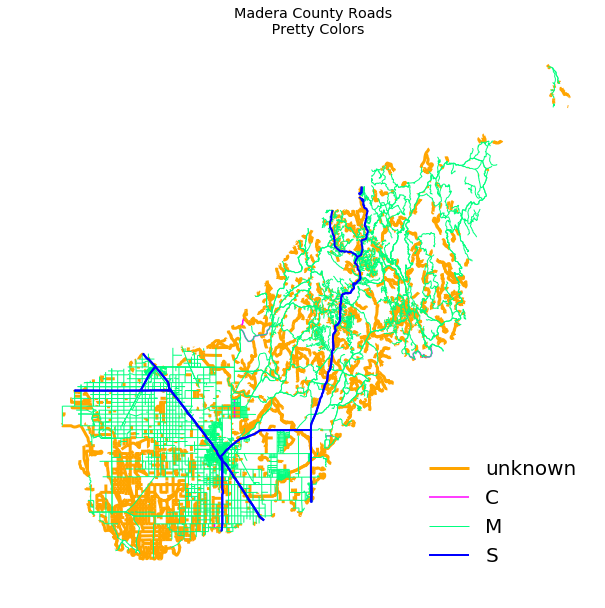

In [29]:
roadPalette = {'M': 'springgreen', 'S': "blue", 'C': "magenta", '': "orange"}
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, '': 3}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
ax.set(title='Madera County Roads \n Pretty Colors')
ax.legend(loc='lower right', fontsize=20, frameon=False)

In [30]:
# ```{r plot-different-colors, fig.cap='adjust colors'}



# # manually set the colors for the plot!

# newColors <- c("springgreen", "blue", "magenta", "orange")

# newColors



# # plot using new colors

# plot(sjer_roads,

#      col=(newColors)[sjer_roads$RTTYP],

#      main="Madera County Roads \n Pretty Colors")



# # add a legend to our map

# legend("bottomright",

#        levels(sjer_roads$RTTYP),

#        fill=newColors,

#        bty="n", cex=.8)



# ```




<i class="fa fa-star"></i> **Data Tip:** You can modify the defaul R color palette

using the palette method. For example `palette(rainbow(6))` or

`palette(terrain.colors(6))`. You can reset the palette colors using

`palette("default")`!

{: .notice}



##  Plot Lines by Attribute



Create a plot that emphasizes only roads designated as C or S (County or State).

To emphasize these types of roads, make the lines that are C or S, THICKER than

the other lines.

NOTE: this attribute information is located in the `sjer_roads$RTTYP`

attribute.



Be sure to add a title and legend to your map! You might consider a color

palette that has all County and State roads displayed in a bright color. All

other lines can be grey.




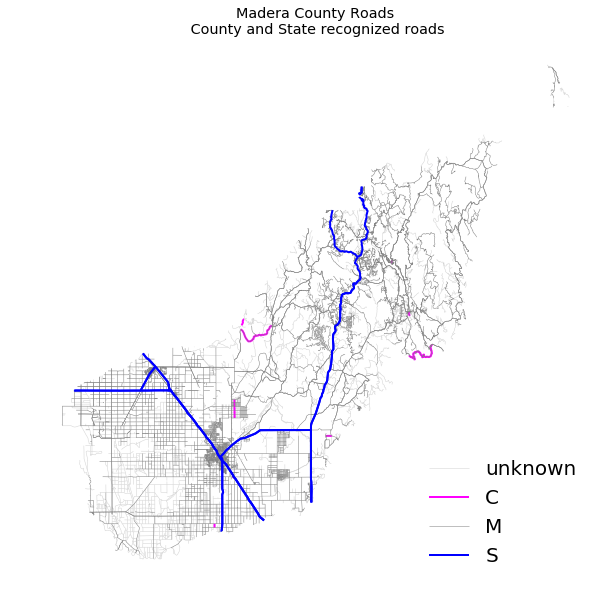

In [31]:
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
ax.set(title='Madera County Roads\n County and State recognized roads')
ax.legend(loc='lower right', fontsize=20, frameon=False)

In [32]:
# ```{r road-map-2, include=TRUE, fig.cap='emphasize some attributes'}

# # view levels

# levels(sjer_roads$RTTYP)

# # make sure the attribute is of class "factor"

# class(sjer_roads$RTTYP)



# # convert to factor if necessary

# sjer_roads$RTTYP <- as.factor(sjer_roads$RTTYP)

# levels(sjer_roads$RTTYP)



# # count factor levels

# length(levels(sjer_roads$RTTYP))

# # set colors so only the allowed roads are magenta

# # note there are 3 levels so we need 3 colors

# challengeColors <- c("magenta","grey","magenta","grey")

# challengeColors



# # plot using new colors

# plot(sjer_roads,

#      col=(challengeColors)[sjer_roads$RTTYP],

#      lwd=c(4,1,1,1)[sjer_roads$RTTYP],

#      main="SJER Roads")



# # add a legend to our map

# legend("bottomright",

#        levels(sjer_roads$RTTYP),

#        fill=challengeColors,

#        bty="n", # turn off border

#        cex=.8) # adjust font size



# ```




Finall, let's adjust the legend. We want the legend SYMBOLS to represent the

actual symbology in the map - which contains lines, not polygons.




In [33]:
# I *think* this is already taken care of in python...

In [34]:
# ```{r final-custom-legend, fig.cap="Custom legend with lines"}

# # plot using new colors

# plot(sjer_roads,

#      col=(challengeColors)[sjer_roads$RTTYP],

#      lwd=c(4,1,2,1)[sjer_roads$RTTYP], # color each line in the map by attribute

#      main="Madera County Roads\n County and State recognized roads")



# # add a legend to our map

# legend("bottomright",

#        levels(sjer_roads$RTTYP),

#        lty=c(1,1,1,1), # tell are which objects to be drawn as a line in the legend.

#        lwd=c(4,1,2,1),  # set the WIDTH of each legend line

#        col=challengeColors, # set the color of each legend line

#        bty="n", # turn off border

#        cex=.8) # adjust font size



# ```




<!-- C = County

I = Interstate

M = Common Name

O = Other

S = State recognized

U = U.S.-->



## Adding point and lines to a legend



The last step in customizing a legend is adding different types of symbols to

the plot. In the example above, we just added lines. But what if we wanted to add

some POINTS too? We will do that next.



In the data below, we've create a custom legend where each symbol type and color

is defined using a vector. We have 3 levels: grass, soil and trees. Thus we

need to define 3 symbols and 3 colors for our legend and our plot.



`pch=c(8,18,8)`



`plot_colors <- c("chartreuse4", "burlywood4", "darkgreen")`




In [35]:
# import points layer
sjer_plots = gpd.read_file("data/week_05/california/SJER/vector_data/SJER_plot_centroids.shp")

In [36]:
# ```{r import-plots, results='hide'}

# # import points layer

# sjer_plots <- readOGR("data/week5/california/SJER/vector_data",

#                       "SJER_plot_centroids")

# ```


In [37]:
sjer_plots

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.76 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.57)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.39 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


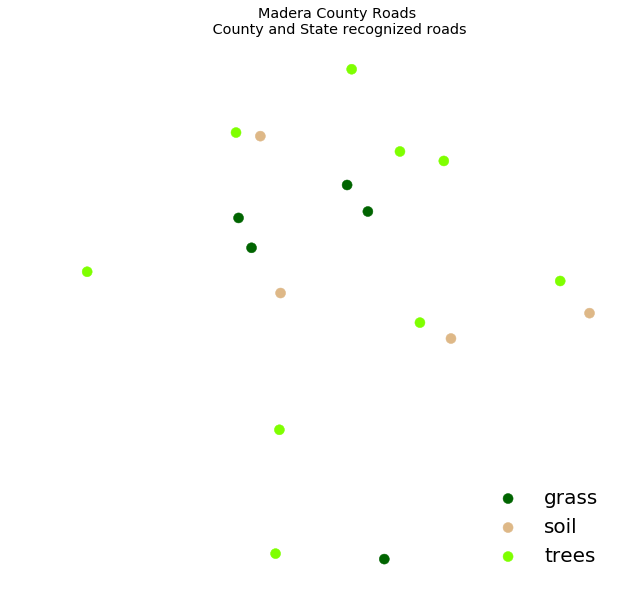

In [38]:
pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, label=label, markersize=100)
ax.set(title='Madera County Roads\n County and State recognized roads')
ax.legend(loc='lower right', fontsize=20, frameon=False)

In [39]:
# ```{r legend-points-lines, fig.cap="plot legend with points and lines" }

# sjer_plots$plot_type <- as.factor(sjer_plots$plot_type)

# levels(sjer_plots$plot_type)

# # grass, soil trees

# plot_colors <- c("chartreuse4", "burlywood4", "darkgreen")



# # plot using new colors

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      pch=8,

#      main="Madera County Roads\n County and State recognized roads")





# # add a legend to our map

# legend("bottomright",

#        legend = levels(sjer_plots$plot_type),

#        pch=c(8,18,8),  # set the WIDTH of each legend line

#        col=plot_colors, # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9) # adjust legend font size



# ```




Next, let's try to plot our roads on top of the plot locations. Then let's create

a custom legend that contains both lines and points. NOTE: in this example i've

fixed the projection for the roads layer and cropped it! You will have to do the same before

this code will work.




In [40]:
sjer_aoi = gpd.read_file("data/week_05/california/SJER/vector_data/SJER_crop.shp")

sjer_roads_utm = sjer_roads.to_crs(crs=sjer_aoi.crs)

# Not sure about this one: sjer_roads_utm <- crop(sjer_roads_utm, sjer_aoi)


In [41]:
# ```{r reproject-data, echo=FALSE, warning=FALSE, message=FALSE, results='hide', fig.cap="plot legend with points and lines and subheading." }



# # load crop extent layer

# sjer_aoi <- readOGR("data/week5/california/SJER/vector_data",

#                     "SJER_crop")



# # reproject line and point data

# sjer_roads_utm  <- spTransform(sjer_roads,

#                                 crs(sjer_aoi))



# sjer_roads_utm <- crop(sjer_roads_utm, sjer_aoi)



# ```




When we create a legend, we will have to add the labels for both the points

layer and the lines layer.



`c(levels(sjer_plots$plot_type), levels(sjer_roads$RTTYP))`




In [42]:
# ```{r create-legend-list }

# # view all elements in legend

# c(levels(sjer_plots$plot_type), levels(sjer_roads$RTTYP))



# ```


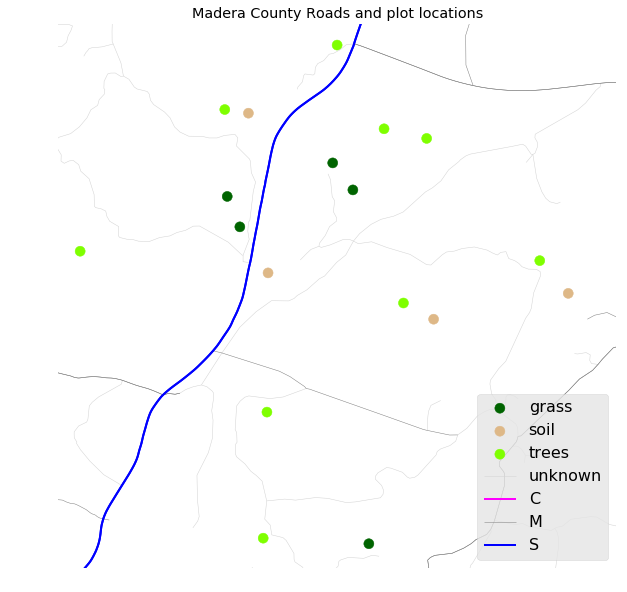

In [43]:
pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, label=label, markersize=100)


# Plot roads
for ctype, data in sjer_roads_utm.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
    
ax.set(title='Madera County Roads and plot locations')
ax.set(xlim=sjer_aoi.bounds[['minx', 'maxx']].values.squeeze(),
       ylim=sjer_aoi.bounds[['miny', 'maxy']].values.squeeze())
ax.legend(loc='lower right', fontsize=16, frameon=True)


In [44]:
# ```{r custom-legend-points-lines, fig.cap="final plot custom legend."}



# # plot using new colors

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      pch=8,

#      main="Madera County Roads and plot locations")



# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend("bottomright",

#        legend = c(levels(sjer_plots$plot_type), levels(sjer_roads$RTTYP)),

#        pch=c(8,18,8),  # set the WIDTH of each legend line

#        col=plot_colors, # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9) # adjust legend font size

# ```






Next we have to tell `R`, which symbols are lines and which are point symbols. We

can do that using the lty argument. We have 3 unique point symbols and 4 unique

line symbols. We can include a NA for each element that should not be a line in

the lty argument:



`lty=c(NA, NA, NA, 1, 1, 1, 1)`



And we include a `NA` value for each element that should not be a symbol in the

`pch` argument:



`pch=c(8, 18, 8, NA, NA, NA, NA)``




In [45]:
# I AM NOT SURE IF WE NEED TO DO THIS IN PYTHON OR NOT!

In [46]:
# ```{r custom-legend-points-lines-2, fig.cap="Plot with points and lines customized."}



# # plot using new colors

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      pch=8,

#      main="Madera County Roads and plot locations")



# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend("bottomright",

#        legend = c(levels(sjer_plots$plot_type), levels(sjer_roads$RTTYP)),

#        pch=c(8,18,8, NA, NA, NA, NA),  # set the symbol for each point

#        lty=c(NA,NA, NA, 1, 1, 1, 1),

#        col=c(plot_colors, challengeColors), # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9) # adjust legend font size

# ```






## Force the legend to plot next to your plot



Refining the look of your plots takes a bit of patience in R, but it can be

done! Play with the code below to see if you can make your legend plot NEXT TO

rather than on top of your plot.



The steps are:



1. Place your legend on the OUTSIDE of the plot extent by grabbing the `xmax` and `ymax` values from one of the objects that you are plotting's `extent()`. This allows you to be precise in your legend placement.

2. Set the `xpd=T` argument in your legend to enforce plotting outside of the plot extent and

3. OPTIONAL:  adjust the plot **PAR**ameters using `par()`. You can set the **mar**gin

of your plot using `mar=`. This provides extra space on the right (if you'd like your legend to plot on the right) for your legend and avoids things being "chopped off". Provide the `mar=` argument in the

format: `c(bottom, left, top, right)`. The code below is telling r to add 7 units

of padding on the RIGHT hand side of our plot. The default units are INCHES.



**IMPORTANT:** be cautious with margins. Sometimes they can cause problems when you

knit - particularly if they are too large.



Let's give this a try. First, we grab the northwest corner location x and y. We

will use this to place our legend.




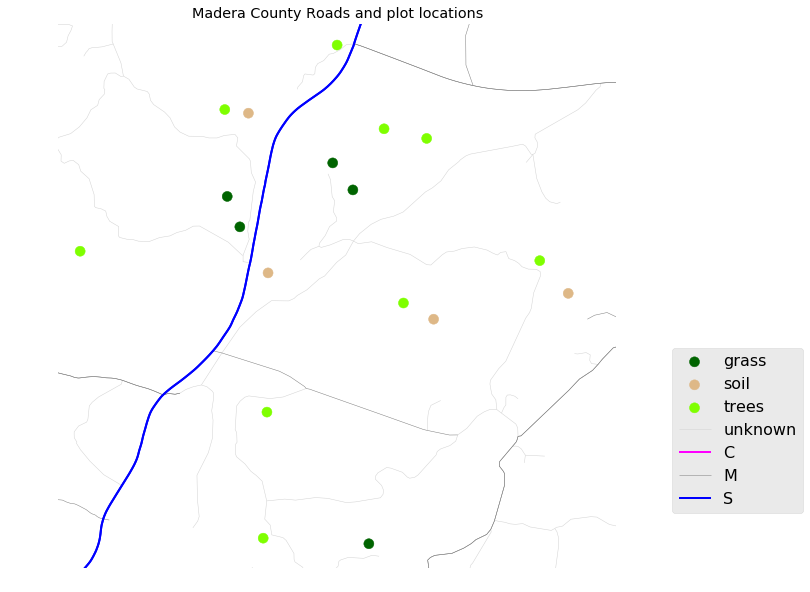

In [47]:
pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, label=label, markersize=100)


# Plot roads
for ctype, data in sjer_roads_utm.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
    
ax.set(title='Madera County Roads and plot locations')
ax.set(xlim=sjer_aoi.bounds[['minx', 'maxx']].values.squeeze(),
       ylim=sjer_aoi.bounds[['miny', 'maxy']].values.squeeze())
ax.legend(loc=(1.1, .1), fontsize=16, frameon=True)


In [48]:
# ```{r adjust-legend, fig.cap="plot with fixed legend"}

# # figure out where the upper RIGHT hand corner of our plot extent is

# the_plot_extent <- extent(sjer_aoi)



# # grab the upper right hand corner coordinates

# furthest_pt_east <- the_plot_extent@xmax

# furthest_pt_north <- the_plot_extent@ymax

# # view values

# furthest_pt_east

# furthest_pt_north



# # plot using new colors

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      pch=8,

#      main="Madera County Roads and plot locations")



# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend(x=furthest_pt_east, y=furthest_pt_north,

#        legend = c(levels(sjer_plots$plot_type), levels(sjer_roads$RTTYP)),

#        pch=c(8, 18, 8, NA, NA, NA, NA),  # set the symbol for each point

#        lty=c(NA, NA, NA, 1, 1, 1, 1) ,

#        col=c(plot_colors, challengeColors), # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9, # adjust legend font size

#        xpd=T) # force the legend to plot outside of your extent



# ```


In [49]:
# ```{r, echo=FALSE, results='hide', message=FALSE}

# dev.off()

# ```




Let's use the margin parameter to clean things up. Also notice i'm using the

AOI extent layer to create a "box" around my plot. Now things are starting to

look much cleaner!



I've also added some "fake" legend elements to create subheadings like we

might add to a map legend in QGIS or ArcGIS.



`legend = c("Plots", levels(sjer_plots$plot_type), "Road Types", levels(sjer_roads$RTTYP))`




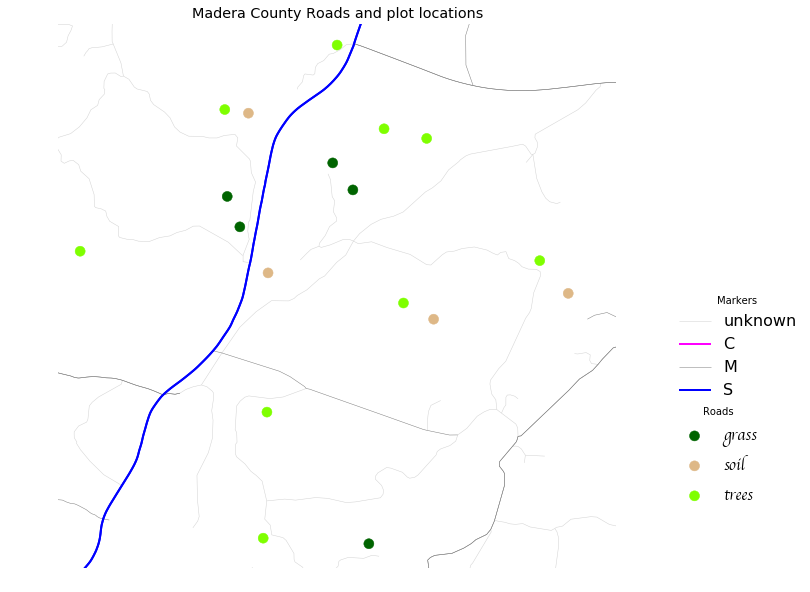

In [50]:
# This gets most of the way there...not sure exactly what you want the final to
# look like so we can iterate from this.
pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, label=label, markersize=100)


# Plot roads
for ctype, data in sjer_roads_utm.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
    
ax.set(title='Madera County Roads and plot locations')
ax.set(xlim=sjer_aoi.bounds[['minx', 'maxx']].values.squeeze(),
       ylim=sjer_aoi.bounds[['miny', 'maxy']].values.squeeze())

# Set up legend
points = ax.collections[:3]
lines = ax.collections[3:]
leg1 = ax.legend(points, [point.get_label() for point in points], loc=(1.1, .1), prop={'size': 16, 'family': 'cursive'},
                  frameon=False, title='Roads')
ax.add_artist(leg1)

leg2 = ax.legend(lines, [line.get_label() for line in lines], loc=(1.1, .3), prop={'size': 16},
                  frameon=False, title='Markers')


In [51]:
# ```{r custom-legend-points-lines-22, fig.cap="final legend with points and lines customized 2ß."}

# # adjust margin to make room for the legend

# par(mar=c(2, 2, 4, 7))

# # plot using new colors

# plot(sjer_aoi,

#      border="grey",

#      lwd=2,

#      main="Madera County Roads and plot locations")

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      add=T,

#      pch=8)

# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend(x=(furthest_pt_east+50), y=(furthest_pt_north-15),

#        legend = c("Plots", levels(sjer_plots$plot_type), "Road Types", levels(sjer_roads$RTTYP)),

#        pch=c(NA, 8, 18, 8, NA, NA, NA, NA, NA),  # set the symbol for each point

#        lty=c(NA,NA,NA, NA, NA, 1, 1, 1, 1),

#        col=c(plot_colors, challengeColors), # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9, # adjust legend font size

#        xpd=T)



# ```


In [52]:
# ```{r, echo=FALSE, results='hide'}

# dev.off()

# ```




Let's take customization a step further. I can adjust the font styles in the legend

too to make it look **even prettier**. To do this, we use the `text.font` argument.



The possible values for the `text.font` argument are:



* 1: normal

* 2: bold

* 3: italic

* 4: bold and italic



Notice below, i am passing a vector of values, one value to represent each 

element in the legend.




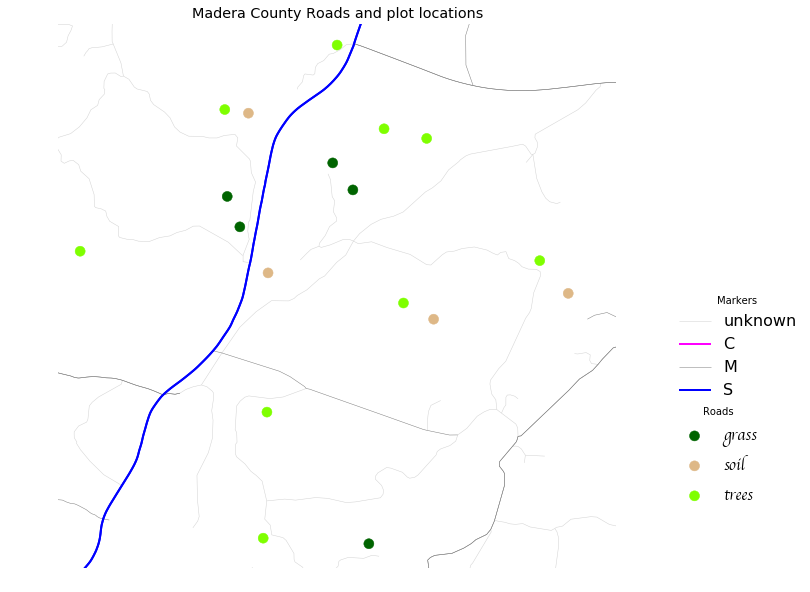

In [53]:
# This gets most of the way there...not sure exactly what you want the final to
# look like so we can iterate from this.
pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue", 'C': "magenta", '': "lightgrey"}
lineWidths = {'M': .5, 'S': 2, 'C': 2, '': .5}

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, label=label, markersize=100)


# Plot roads
for ctype, data in sjer_roads_utm.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype if len(ctype) > 0 else 'unknown'
    data.plot(color=color, ax=ax, linewidth=lineWidths[ctype], label=label)
    
ax.set(title='Madera County Roads and plot locations')
ax.set(xlim=sjer_aoi.bounds[['minx', 'maxx']].values.squeeze(),
       ylim=sjer_aoi.bounds[['miny', 'maxy']].values.squeeze())

# Set up legend
points = ax.collections[:3]
lines = ax.collections[3:]
leg1 = ax.legend(points, [point.get_label() for point in points], loc=(1.1, .1), prop={'size': 16, 'family': 'cursive'},
                  frameon=False, title='Roads')
ax.add_artist(leg1)

leg2 = ax.legend(lines, [line.get_label() for line in lines], loc=(1.1, .3), prop={'size': 16},
                  frameon=False, title='Markers')


In [54]:
# ```{r custom-legend-points-lines-3, fig.cap="final legend with points and lines customized 2ß."}

# # adjust margin to make room for the legend

# par(mar=c(2, 2, 4, 7))

# # plot using new colors

# plot(sjer_aoi,

#      border="grey",

#      lwd=2,

#      main="Madera County Roads and plot locations")

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      add=T,

#      pch=8)

# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend(x=(furthest_pt_east+50), y=(furthest_pt_north-15),

#        legend = c("Plots", levels(sjer_plots$plot_type), "Road Types", levels(sjer_roads$RTTYP)),

#        pch=c(NA, 8, 18, 8, NA, NA, NA, NA, NA),  # set the symbol for each point

#        lty=c(NA,NA,NA, NA, NA, 1, 1, 1, 1),

#        col=c(plot_colors, challengeColors), # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9, # adjust legend font size

#        xpd=T,

#        text.font =c(2, 1, 1, 1, 2, 1, 1, 1, 1))



# ```


In [55]:
# ```{r, echo=FALSE, results='hide'}

# dev.off()

# ```




Now, if you want to move the legend out a bit further, what would you do?



## BONUS!



Any idea how I added a space to the legend below to create "sections"?




In [56]:
# Also not sure what you want this to look like either, but let me know and we can figure it out.

In [57]:
# ```{r custom-legend-points-lines-4, echo=FALSE, fig.cap="final legend with points and lines customized."}



# par(mar=c(2,2,4,7))

# # plot using new colors

# plot(sjer_aoi,

#      border="grey",

#      lwd=2,

#      main="Madera County Roads and plot locations")

# plot(sjer_plots,

#      col=(plot_colors)[sjer_plots$plot_type],

#      add=T,

#      pch=8)

# # plot using new colors

# plot(sjer_roads_utm,

#      col=(challengeColors)[sjer_plots$plot_type],

#      pch=8,

#      add=T)



# # add a legend to our map

# legend(x=(furthest_pt_east+50), y=(furthest_pt_north-15),

#        legend = c("Plots",levels(sjer_plots$plot_type), "", "Road Types", levels(sjer_roads$RTTYP)),

#        pch=c(NA,8,18,8, NA, NA, NA, NA, NA, NA),  # set the symbol for each point

#        lty=c(NA,NA,NA, NA, NA, NA,1, 1, 1, 1),

#        col=c(plot_colors, challengeColors), # set the color of each legend line

#        bty="n", # turn off border

#        cex=.9, # adjust legend font size

#        xpd=T,

#        text.font =c(2, 1, 1, 1, 1, 2, 1, 1, 1, 1))



# ```


In [58]:
# ```{r results='hide'}

# # important: once you are done, reset par which resets plot margins

# # otherwise margins will carry over to your next plot and cause problems!

# dev.off()

# ```
